## Imports

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

## Dataset

In [91]:
df = pd.read_csv("../data/unemployment_tweets.csv")
df.head()

,tweet
0,"#Unemployment below 700,000, lowest since Apri..."
1,Throwback to this opinion piece I wrote on Jun...
2,Malaysia Witnesses Influx Of Indonesian Migran...
3,Unemployment levels over 30 years in Malaysia ...
4,Happy to see unemployment levels dipping in Ma...


## Word Cloud

In [92]:
mask = np.array(Image.open("../assets/unemployment-wordcloud-mask.png"))

In [93]:
def transform_format(val):
    if val == 0:
        return 255
    return val

In [94]:
transformed_mask = np.ndarray((mask.shape[0], mask.shape[1]), np.int32)

for i in range(len(mask)):
    transformed_mask[i] = list(map(transform_format, mask[i]))

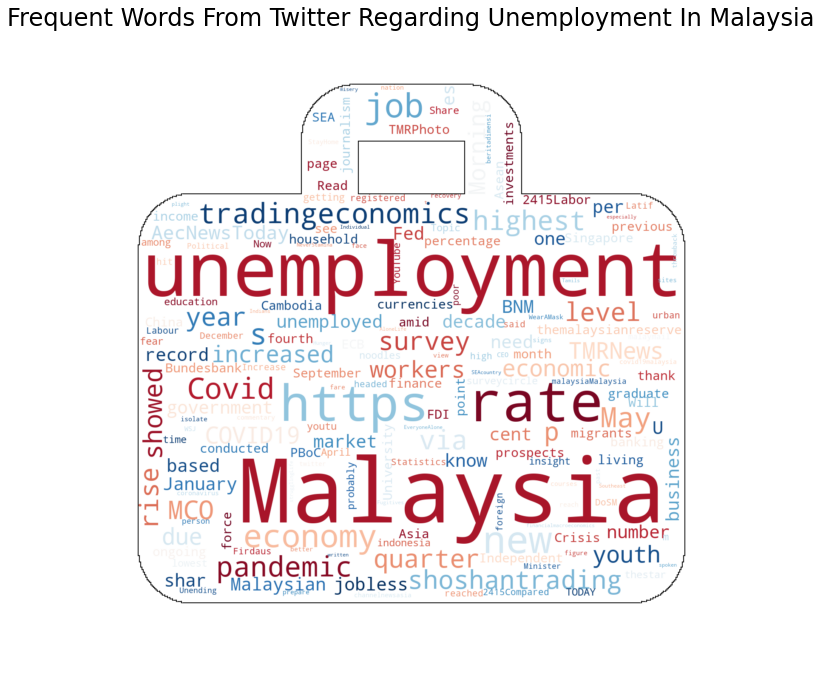

In [95]:
words = "".join(tweet for tweet in df["tweet"])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      collocations=False,
                      background_color="white",
                      mask=transformed_mask,
                      contour_color="black",
                      contour_width=1,
                      colormap="RdBu",
                      scale=3,
                      random_state=42,).generate(words)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.title("Frequent Words From Twitter Regarding Unemployment In Malaysia", fontsize=24)

plt.savefig("../visualizations/unemployment-wordcloud.png")
plt.show()